## Exploratory Data Analysis on the audio files

In [1]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io import wavfile
#import wave
import librosa
import pandas as pd
import librosa.display
from scipy.signal import periodogram

In [15]:
import seaborn as sns

#### The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
##### [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
##### [classID] = a numeric identifier of the sound class (see description of classID below for further details)
        A numeric identifier of the sound class:
        0 = air_conditioner
        1 = car_horn
        2 = children_playing
        3 = dog_bark
        4 = drilling
        5 = engine_idling
        6 = gun_shot
        7 = jackhammer
        8 = siren
        9 = street_music
##### [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
##### [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence
##### 

In [2]:
print(os.listdir('./dataset/audio'))

['.DS_Store', 'fold1', 'fold10', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


#### There are 24 bit wavefiles also, which cannot be read by read function in scipy's wavfile function. So lets define a custom function for that

#### There are 10 folders, each containing '.wav' files

In [2]:
test_file = os.listdir('./dataset/audio/fold1')[1]
data,sampling_rate = librosa.load('./dataset/audio/fold1/'+test_file)
print("Sampling rate: "+str(sampling_rate))
print("Audio data: "+str(data))
print("Length of audio: " + str(len(data)/sampling_rate))

Sampling rate: 22050
Audio data: [-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]
Length of audio: 4.0


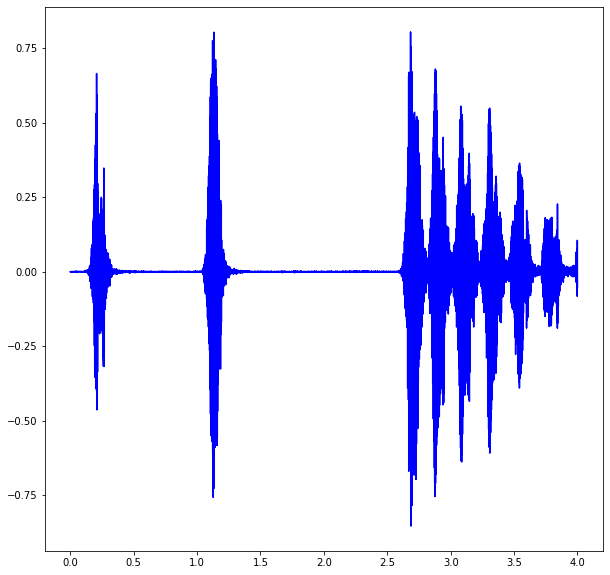

In [10]:
#Plot the signal
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,4,len(data)),data,color='blue')
plt.show()

Class: 3


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

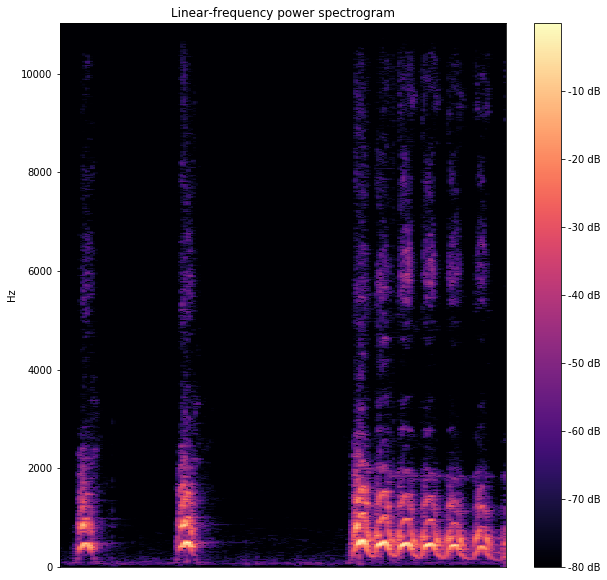

In [11]:
#Power frequency spectpgram of the signal
print("Class: "+str(test_file.split('-')[1]))
plt.figure(figsize=(10, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

#### Lets see the distribution of the dominant frequencies in each class

In [13]:
#Using fft to find the dominant frequencies(this operation can be parallelised)
freqs = {k:[] for k in range(10)}
for folder in os.listdir('./dataset/audio'):
    if(folder == '.DS_Store'):
        continue
    for file in os.listdir('./dataset/audio'+'/'+folder):
        if(file=='.DS_Store'):
            continue
        class_id = file.split('-')[1]    
        data,sample_rate = librosa.load('./dataset/audio'+'/'+folder + '/'+file)    
        freq,PSD = periodogram(data,fs=sample_rate)
        max_id = np.flip(np.argsort(PSD))[:1][0]
        freqs[int(class_id)].append(freq[max_id])
        #print('Done for this file..!')
    print('------Done for a folder..!----')    

------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----
------Done for a folder..!----


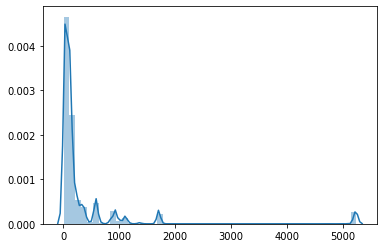

In [19]:
#distribution plots
#for class 0
sns.distplot(freqs[0],kde=True,label='Dominant frequency distribution of class 0')

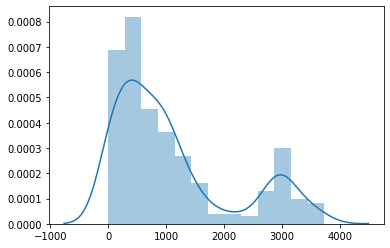

In [20]:
#for class 1
sns.distplot(freqs[1],kde=True,label='Dominant frequency distribution of class 1')

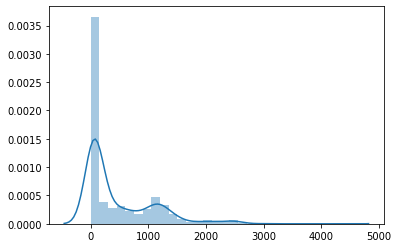

In [21]:
#for class 2
sns.distplot(freqs[2],kde=True,label='Dominant frequency distribution of class 2')

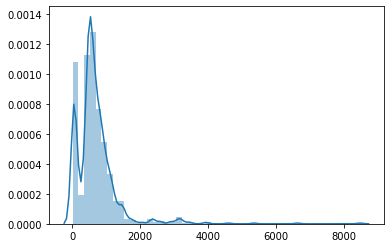

In [22]:
#for class 3
sns.distplot(freqs[3],kde=True,label='Dominant frequency distribution of class 3')

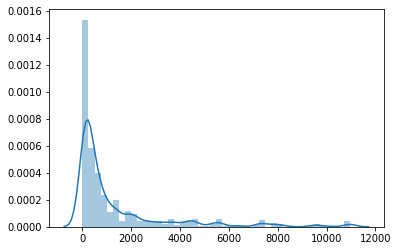

In [23]:
#for class 4
sns.distplot(freqs[4],kde=True,label='Dominant frequency distribution of class 4')

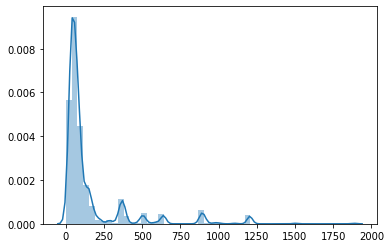

In [24]:
#for class 5
sns.distplot(freqs[5],kde=True,label='Dominant frequency distribution of class 5')

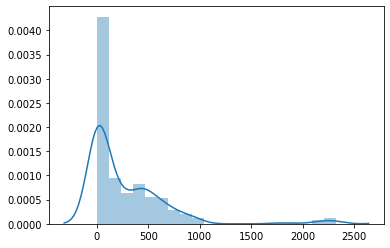

In [25]:
#for class 6
sns.distplot(freqs[6],kde=True,label='Dominant frequency distribution of class 6')

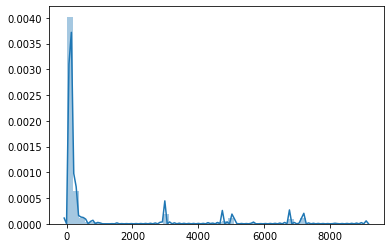

In [26]:
#for class 7
sns.distplot(freqs[7],kde=True,label='Dominant frequency distribution of class 7')

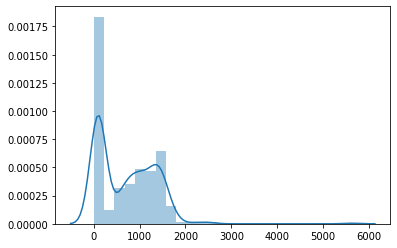

In [27]:
#for class 8
sns.distplot(freqs[8],kde=True,label='Dominant frequency distribution of class 8')

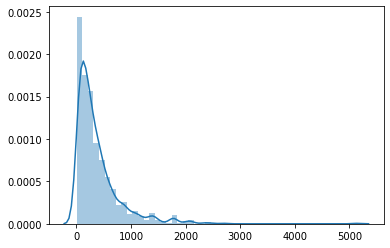

In [28]:
#for class 9
sns.distplot(freqs[9],kde=True,label='Dominant frequency distribution of class 9')